In [1]:
import sys
import os

package_path = '..'
if package_path not in sys.path:
    sys.path.append(package_path)

In [2]:
%load_ext autoreload
%autoreload 2

# Main NoteBook

In [3]:
from analyzer.core import DataAnalyzer
from src.config import load_config
config = load_config()
config

ExperimentConfiguration(param=ConfigurationParameters(hutch='eh1', detector='jungfrau2', xray='HX', pump_setting='30HZ', x1=0, x2=1, y1=2, y2=3, sdd=1.3, dps=7.5e-05, beam_energy=9.7, sigma_factor=1, wavelength=1.2781876127134046), path=ConfigurationPaths(load_dir='Y:\240608_FXS\raw_data\h5\type=raw', save_dir='Y:\240608_FXS\raw_data\h5\type=raw', param_dir='Y:\240608_FXS\raw_data\h5\type=raw\DataParameter', image_dir='Y:\240608_FXS\raw_data\h5\type=raw\Image', mat_dir='Y:\240608_FXS\raw_data\h5\type=raw\Mat_files2', npz_dir='Y:\240608_FXS\raw_data\h5\type=raw\Npz_files', tif_dir='Y:\240608_FXS\raw_data\h5\type=raw\Tif_files'))

In [4]:
def get_npz_file_name(run, scan, config, comment=None):
    npz_dir: str = config.path.npz_dir
    file_name: str = f"run={run:0>4}_scan={scan:0>4}"
    if comment is not None:
        file_name += comment
    return os.path.join(npz_dir, file_name + ".npz")

In [16]:
run: int = 143
scan: int = 1
print(f"RUN={run:0>3}, SCAN={scan:0>3}")

RUN=143, SCAN=001


In [6]:
npz_file: str = get_npz_file_name(run, scan, config)
analyzer = DataAnalyzer(npz_file)

poff_images = analyzer.poff_images
pon_images = analyzer.pon_images

print(f"{poff_images.shape = }")
print(f"{pon_images.shape = }")

poff_images.shape = (84, 514, 1030)
pon_images.shape = (84, 514, 1030)


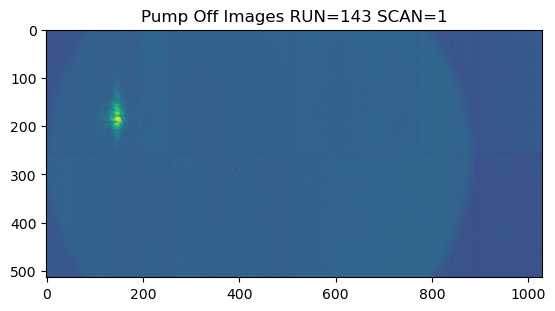

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.imshow(np.log1p(poff_images.sum(axis=0)))
ax.set_title(f"Pump Off Images RUN={run} SCAN={scan}");

In [15]:
from roi_rectangle import RoiRectangle
roi_rect = RoiRectangle(50, 50, 300, 300)
roi_poff_images = roi_rect.slice(poff_images)
roi_pon_images = roi_rect.slice(pon_images)

print(f"ROI: x1={roi_rect.x1}, y1={roi_rect.y1}, x2={roi_rect.x2}, y2={roi_rect.y2}")
print(f"Roi Pump Off Images Shape: {roi_poff_images.shape}")
print(f"Roi Pump On Images Shape: {roi_pon_images.shape}")

ROI: x1=50, y1=50, x2=300, y2=300
Roi Pump Off Images Shape: (84, 251, 251)
Roi Pump On Images Shape: (84, 251, 251)


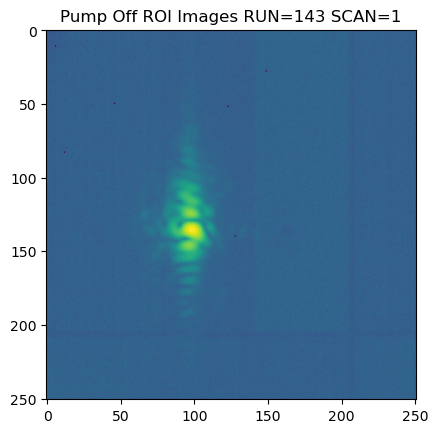

In [17]:
fig, ax = plt.subplots(1, 1)
ax.imshow(np.log1p(roi_poff_images.sum(axis=0)))
ax.set_title(f"Pump Off ROI Images RUN={run} SCAN={scan}");